In [1]:
from src.dataloader import get_dataset
import tqdm as tqdm
import nibabel as nib
import glob
import os
import numpy as np

/cluster/home/herminea/.conda/envs/tdt4265_medseg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG"
data_dir_train = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train"

# Print folders and files within the data directory
print(f"Data directory: {os.listdir(data_dir)}")

train_dataset = get_dataset(data_dir, subset="train", augment=False)
test_dataset = get_dataset(data_dir, subset="test", augment=False)

print(f"Total images in 'train' dataset: {len(train_dataset)}")
print(f"Total images in 'test' dataset: {len(test_dataset)}")



Data directory: ['LICENSE.txt', 'HNTSMRG24_train.zip', 'README.md', 'test', 'train']
Total images in 'train' dataset: 1170
Total images in 'test' dataset: 180


In [3]:
train_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/"  # Adjust path if necessary
test_dir = "/cluster/projects/vc/data/mic/open/HNTS-MRG/test/"

# List some files
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train Samples:", train_files[:5])  # Show first 5 files
print("Test Samples:", test_files[:5])

Train Samples: ['50', '46', '75', '119', '11']
Test Samples: ['145', '108', '29', '36', '88']


In [4]:
sample_ids = train_files[:5]  # Select first 5 samples

for sample_id in sample_ids:

    preRT_path = os.path.join(train_dir, sample_id, "preRT")
    midRT_path = os.path.join(train_dir, sample_id, "midRT")

    # List files inside preRT and midRT
    preRT_files = os.listdir(preRT_path) if os.path.exists(preRT_path) else []
    midRT_files = os.listdir(midRT_path) if os.path.exists(midRT_path) else []

    print(f"Files in preRT_path:", preRT_files)
    print(f"Files in midRT_path:", midRT_files, "\n")

Files in preRT_path: ['50_preRT_mask.nii.gz', '50_preRT_T2.nii.gz']
Files in midRT_path: ['50_midRT_mask.nii.gz', '50_midRT_T2.nii.gz', '50_preRT_mask_registered.nii.gz', '50_preRT_T2_registered.nii.gz'] 

Files in preRT_path: ['46_preRT_mask.nii.gz', '46_preRT_T2.nii.gz']
Files in midRT_path: ['46_preRT_T2_registered.nii.gz', '46_preRT_mask_registered.nii.gz', '46_midRT_T2.nii.gz', '46_midRT_mask.nii.gz'] 

Files in preRT_path: ['75_preRT_T2.nii.gz', '75_preRT_mask.nii.gz']
Files in midRT_path: ['75_preRT_T2_registered.nii.gz', '75_midRT_mask.nii.gz', '75_midRT_T2.nii.gz', '75_preRT_mask_registered.nii.gz'] 

Files in preRT_path: ['119_preRT_T2.nii.gz', '119_preRT_mask.nii.gz']
Files in midRT_path: ['119_preRT_mask_registered.nii.gz', '119_midRT_T2.nii.gz', '119_midRT_mask.nii.gz', '119_preRT_T2_registered.nii.gz'] 

Files in preRT_path: ['11_preRT_mask.nii.gz', '11_preRT_T2.nii.gz']
Files in midRT_path: ['11_midRT_T2.nii.gz', '11_preRT_mask_registered.nii.gz', '11_preRT_T2_registered

In [5]:
# Pick a sample file
sample_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/50/preRT/50_preRT_T2.nii.gz"
mask_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/50/preRT/50_preRT_mask.nii.gz"

# Load the MRI and mask
mri_img = nib.load(sample_file)
mask_img = nib.load(mask_file)

# Extract image data
mri_data = mri_img.get_fdata()
mask_data = mask_img.get_fdata()

# Print details
print("MRI Shape:", mri_data.shape)
print("Mask Shape:", mask_data.shape)
print("Voxel Spacing:", mri_img.header.get_zooms())  # Spacing in mm
print("Intensity Range (MRI):", np.min(mri_data), "-", np.max(mri_data))
print("Unique Values in Mask:", np.unique(mask_data))  # Should be 0 (background) & 1 (tumor)


MRI Shape: (512, 512, 70)
Mask Shape: (512, 512, 70)
Voxel Spacing: (0.5, 0.5, 2.0)
Intensity Range (MRI): 0.0 - 417.0
Unique Values in Mask: [0. 1. 2.]


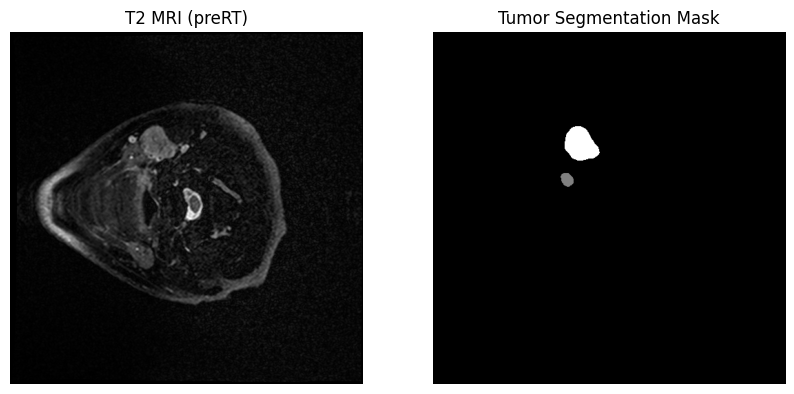

In [6]:
import matplotlib.pyplot as plt

# Pick a middle slice
slice_idx = mri_data.shape[2] // 2

# Display MRI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.title("T2 MRI (preRT)")
plt.axis("off")

# Display Mask
plt.subplot(1, 2, 2)
plt.imshow(mask_data[:, :, slice_idx], cmap="gray")
plt.title("Tumor Segmentation Mask")
plt.axis("off")

plt.show()


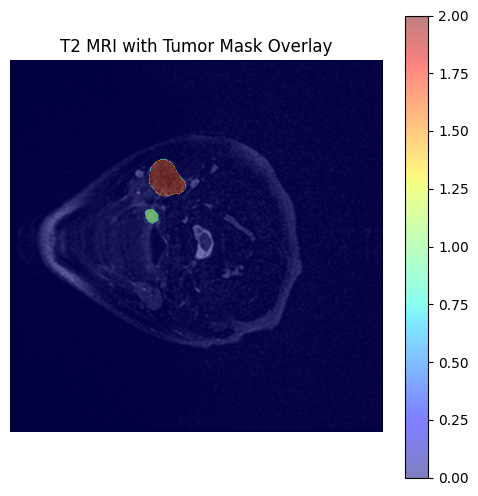

In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.imshow(mask_data[:, :, slice_idx], cmap="jet", alpha=0.5)  # Overlay mask
plt.colorbar()
plt.title("T2 MRI with Tumor Mask Overlay")
plt.axis("off")
plt.show()


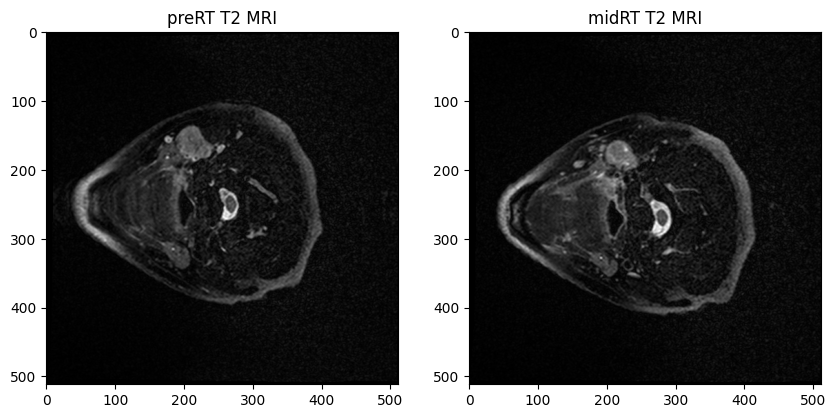

In [8]:
# Load midRT image
midRT_file = "/cluster/projects/vc/data/mic/open/HNTS-MRG/train/50/midRT/50_midRT_T2.nii.gz"
midRT_img = nib.load(midRT_file).get_fdata()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mri_data[:, :, slice_idx], cmap="gray")
plt.title("preRT T2 MRI")

plt.subplot(1, 2, 2)
plt.imshow(midRT_img[:, :, slice_idx], cmap="gray")
plt.title("midRT T2 MRI")

plt.show()


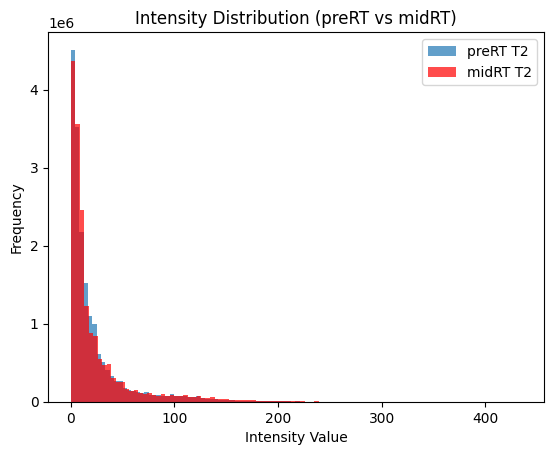

In [9]:
plt.hist(mri_data.flatten(), bins=100, alpha=0.7, label="preRT T2")
plt.hist(midRT_img.flatten(), bins=100, alpha=0.7, label="midRT T2", color="red")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Intensity Distribution (preRT vs midRT)")
plt.show()



In [10]:
tumor_pixels = np.sum(mask_data > 0)
background_pixels = np.sum(mask_data == 0)

tumor_ratio = tumor_pixels / (tumor_pixels + background_pixels)
print(f"Tumor pixels: {tumor_pixels}, Background pixels: {background_pixels}")
print(f"Percentage of tumor pixels: {tumor_ratio*100:.2f}%")


Tumor pixels: 37738, Background pixels: 18312342
Percentage of tumor pixels: 0.21%
